In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("Creditcard_data.csv")

print("Initial class distribution:")
print(data["Class"].value_counts())


Initial class distribution:
Class
0    763
1      9
Name: count, dtype: int64


In [4]:
def balance_using_undersampling(df):
    minority = df[df["Class"] == 1]
    majority = df[df["Class"] == 0]

    majority_reduced = majority.sample(
        n=len(minority),
        random_state=42
    )

    balanced = pd.concat([minority, majority_reduced])
    balanced = balanced.sample(frac=1, random_state=42)

    return balanced


balanced_data = balance_using_undersampling(data)

print("\nClass distribution after undersampling:")
print(balanced_data["Class"].value_counts())


Class distribution after undersampling:
Class
1    9
0    9
Name: count, dtype: int64


In [7]:
def generate_samples(df):
    samples = {}

    samples["Sampling1"] = df.sample(frac=0.8, random_state=1)              # Simple Random
    samples["Sampling2"] = df.iloc[::2]                                      # Systematic

    strat_sample, _ = train_test_split(
        df,
        test_size=0.2,
        stratify=df["Class"],
        random_state=42
    )
    samples["Sampling3"] = strat_sample                                      # Stratified

    cluster_size = 50
    cluster_blocks = [
        df.iloc[i:i+cluster_size]
        for i in range(0, len(df), cluster_size)
    ]
    samples["Sampling4"] = pd.concat(cluster_blocks[:5])

    samples["Sampling5"] = df.sample(frac=0.8, replace=True, random_state=42)

    return samples


sample_sets = generate_samples(balanced_data)

In [8]:
model_bank = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC(kernel="rbf", gamma="scale")
}

In [9]:
def evaluate_models(sample_df):
    X = sample_df.drop("Class", axis=1)
    y = sample_df["Class"]

    accuracy_scores = {}
    for model_name, model in model_bank.items():
        score = cross_val_score(
            model,
            X,
            y,
            cv=5,
            scoring="accuracy"
        ).mean()
        accuracy_scores[model_name] = round(score * 100, 2)

    return accuracy_scores


results = {}
for key, sample in sample_sets.items():
    results[key] = evaluate_models(sample)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [10]:
results_df = pd.DataFrame(results)
print("\nAccuracy Results (Undersampling):\n")
print(results_df)


Accuracy Results (Undersampling):

                     Sampling1  Sampling2  Sampling3  Sampling4  Sampling5
Logistic Regression      93.33       40.0      86.67      61.67      90.00
Decision Tree            66.67       40.0      63.33      76.67      76.67
Random Forest            43.33       30.0      43.33      71.67      80.00
Naive Bayes              60.00       20.0      43.33      38.33      86.67
SVC                      40.00       40.0      26.67      50.00      56.67


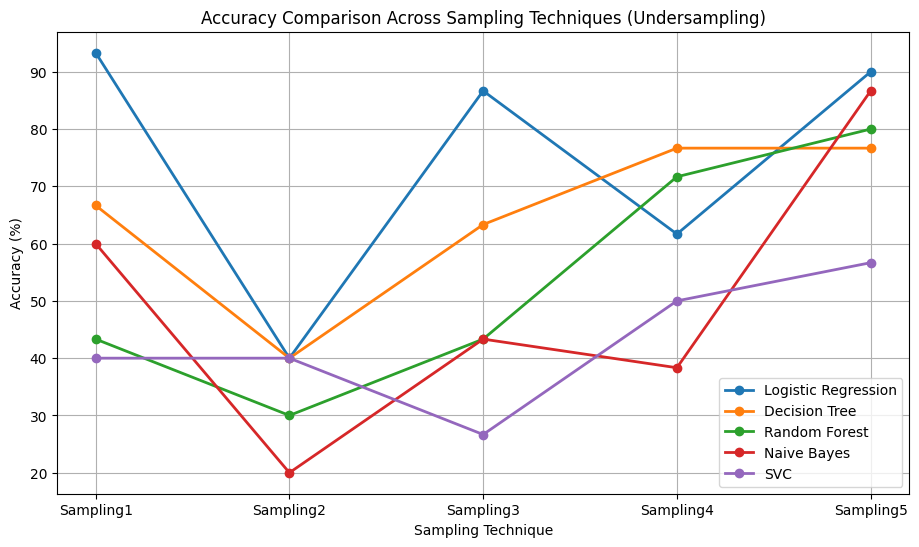

In [11]:
plt.figure(figsize=(11, 6))
for model in results_df.index:
    plt.plot(
        results_df.columns,
        results_df.loc[model],
        marker='o',
        linewidth=2,
        label=model
    )

plt.title("Accuracy Comparison Across Sampling Techniques (Undersampling)")
plt.xlabel("Sampling Technique")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()


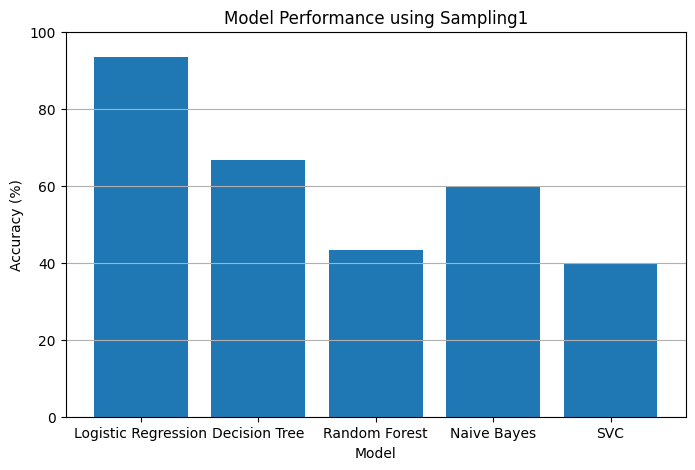

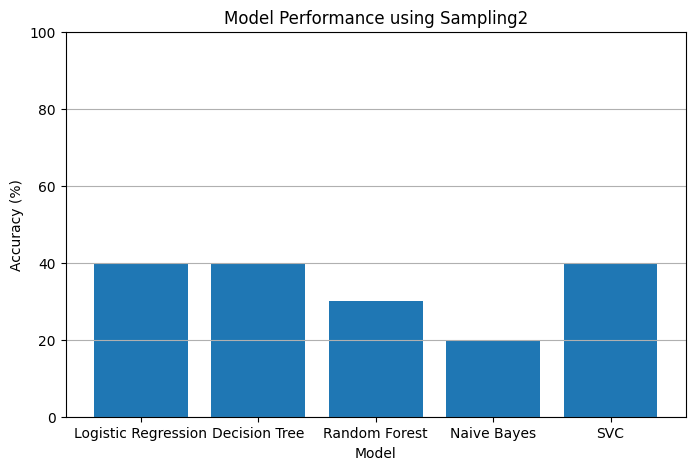

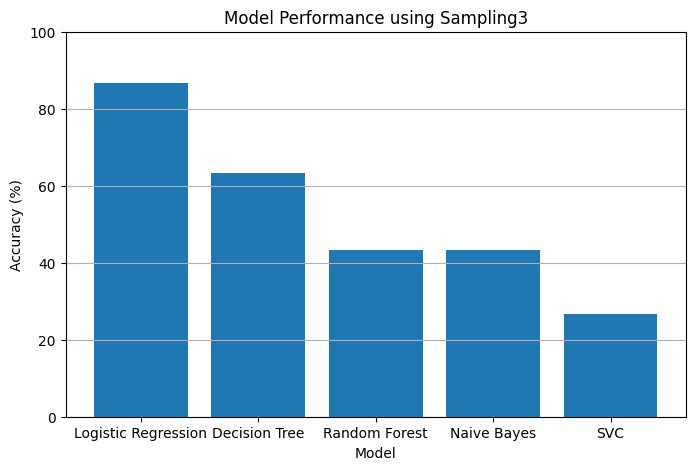

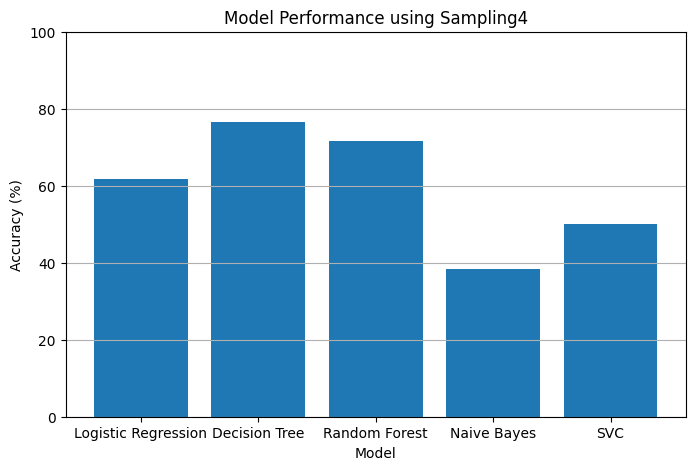

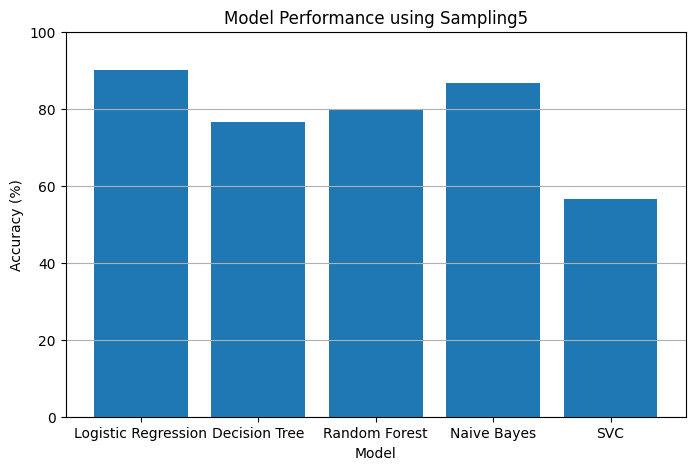

In [12]:
for samp in results_df.columns:
    plt.figure(figsize=(8, 5))
    plt.bar(results_df.index, results_df[samp])
    plt.title(f"Model Performance using {samp}")
    plt.xlabel("Model")
    plt.ylabel("Accuracy (%)")
    plt.ylim(0, 100)
    plt.grid(axis="y")
    plt.show()
